In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install scipy==1.1.0

     |████████████████████████████████| 31.2MB 141kB/s 
ERROR: umap-learn 0.4.4 has requirement scipy>=1.3.1, but you'll have scipy 1.1.0 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [3]:
#%tensorflow_version 1.x
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from sklearn.neighbors import KNeighborsClassifier

tf.__version__

'2.2.0'

# ENGLISH DATA SET

In [4]:
DATADIR = "/content/drive/My Drive/Colab Notebooks/AI/training_type/"
CATEGORIES = "abcdefghijklmnopqrstuvwxyz123456789"

In [5]:
IMG_SIZE = 20
training_data = []

def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    print(path)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        resized_img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([resized_img_array, class_num])
      except Exception as e:
        pass

create_training_data()


/content/drive/My Drive/Colab Notebooks/AI/training_type/a
/content/drive/My Drive/Colab Notebooks/AI/training_type/b
/content/drive/My Drive/Colab Notebooks/AI/training_type/c
/content/drive/My Drive/Colab Notebooks/AI/training_type/d
/content/drive/My Drive/Colab Notebooks/AI/training_type/e
/content/drive/My Drive/Colab Notebooks/AI/training_type/f
/content/drive/My Drive/Colab Notebooks/AI/training_type/g
/content/drive/My Drive/Colab Notebooks/AI/training_type/h
/content/drive/My Drive/Colab Notebooks/AI/training_type/i
/content/drive/My Drive/Colab Notebooks/AI/training_type/j
/content/drive/My Drive/Colab Notebooks/AI/training_type/k
/content/drive/My Drive/Colab Notebooks/AI/training_type/l
/content/drive/My Drive/Colab Notebooks/AI/training_type/m
/content/drive/My Drive/Colab Notebooks/AI/training_type/n
/content/drive/My Drive/Colab Notebooks/AI/training_type/o
/content/drive/My Drive/Colab Notebooks/AI/training_type/p
/content/drive/My Drive/Colab Notebooks/AI/training_type

In [6]:
import random
random.shuffle(training_data)

In [7]:
X = []
y = []

In [8]:
for features, label in training_data:
  X = np.append(X,features)
  y = np.append(y,label)

X = np.array(X).reshape(-1, 20*20)
y = y.astype(int)

In [9]:
X = X/255

# KNN

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [11]:
import math
math.sqrt(len(y_test))

16.583123951777

In [12]:
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=13)
knn_clf.fit(X_train, y_train)

y_knn_pred = knn_clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.850909090909091

In [13]:
#some_digit = X[2734]
#knn_clf.predict([some_digit])

In [14]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[62,  0,  1, ...,  0,  0,  0],
       [ 0, 73,  1, ...,  0,  2,  0],
       [ 0,  0, 78, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 36,  0,  0],
       [ 0,  1,  0, ...,  0, 36,  0],
       [ 0,  0,  0, ...,  0,  0, 35]])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


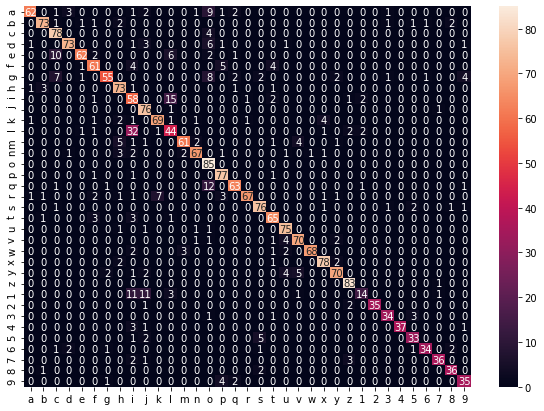

In [15]:
import seaborn as sn
import pandas as pd

df_cm = pd.DataFrame(conf_mx, index = [i for i in "abcdefghijklmnopqrstuvwxyz123456789"],
                  columns = [i for i in "abcdefghijklmnopqrstuvwxyz123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

# SVM

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [17]:
from sklearn.svm import SVC
#Uncomment the following to test SVC with many different cost values
#for i in range (1, 101, 5):
#  model_SVC = SVC(C=i)
#  model_SVC.fit(X_train, y_train)
#  acc = model_SVC.score(X_test, y_test)
#  print (i, "-", acc)


model_SVM = SVC(C=10)
model_SVM.fit(X_train, y_train)
model_SVM.score(X_test, y_test)

0.9127272727272727

In [18]:
y_svm_pred = model_SVM.predict(X_test)

y_train_pred = cross_val_predict(model_SVM, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[69,  0,  0, ...,  0,  0,  0],
       [ 0, 78,  0, ...,  0,  0,  0],
       [ 0,  0, 84, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 35,  0,  0],
       [ 0,  1,  0, ...,  0, 42,  0],
       [ 0,  0,  0, ...,  0,  0, 31]])

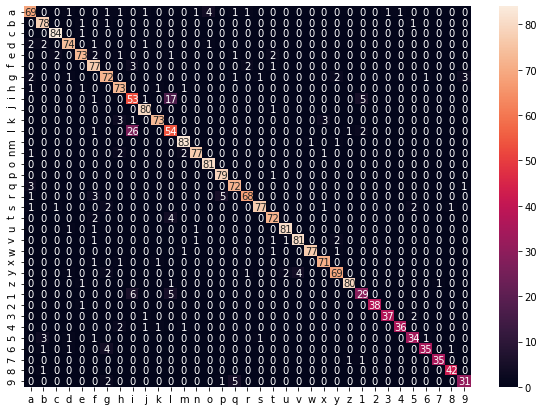

In [19]:
df_cm = pd.DataFrame(conf_mx, index = [i for i in "abcdefghijklmnopqrstuvwxyz123456789"],
                  columns = [i for i in "abcdefghijklmnopqrstuvwxyz123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

# Letter prediction using the SVM model

In [20]:
#print(CATEGORIES[model_SVM.predict(i)[0]])